In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive

'AI prestentation.gdoc'			    'LISTEN TO YOUR HEART.gslides'   Singh_nupur.pdf
 Classroom				     movie_metadata.csv		    'spam (1).csv'
'Colab Notebooks'			     movies_metadata.csv	    'tamoto disease'
 df1_meta.csv				     new.csv			     tmdb_5000_credits.csv
'Fendous  blood group detection app.gdoc'    Nupur_Project_ppt.pptx	     tmdb_5000_movies1.csv
'Fendous@ detection of phishing mail.gdoc'   predictions_plot.png
'kaggle (5).json'			    'Project proposal.gdoc'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
credits_file = '/content/drive/My Drive/tmdb_5000_credits.csv'
movies_file = '/content/drive/My Drive/movies_metadata.csv'

In [ ]:
df2_credits = pd.read_csv(credits_file)

In [ ]:

df3_movies = pd.read_csv(movies_file)



<ipython-input-7-af1e6dfb98f8>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df3_movies = pd.read_csv(movies_file)


In [ ]:
df3_movies = pd.read_csv(movies_file,low_memory = False)

In [ ]:
df3_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df2_credits.head(5)




,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df2_credits.columns


Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [ ]:
df3_movies.head(4)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0


In [ ]:
df3_movies["release_date"]= pd.to_datetime(df3_movies["release_date"],errors= "coerce")





In [ ]:
df3_movies["year"]= df3_movies["release_date"].dt.year

In [ ]:
df3_movies["year"].value_counts().sort_index()

,count
year,
1874.0,1
1878.0,1
1883.0,1
1887.0,1
1888.0,2
...,...
2015.0,1905
2016.0,1604
2017.0,532


<Axes: ylabel='year'>

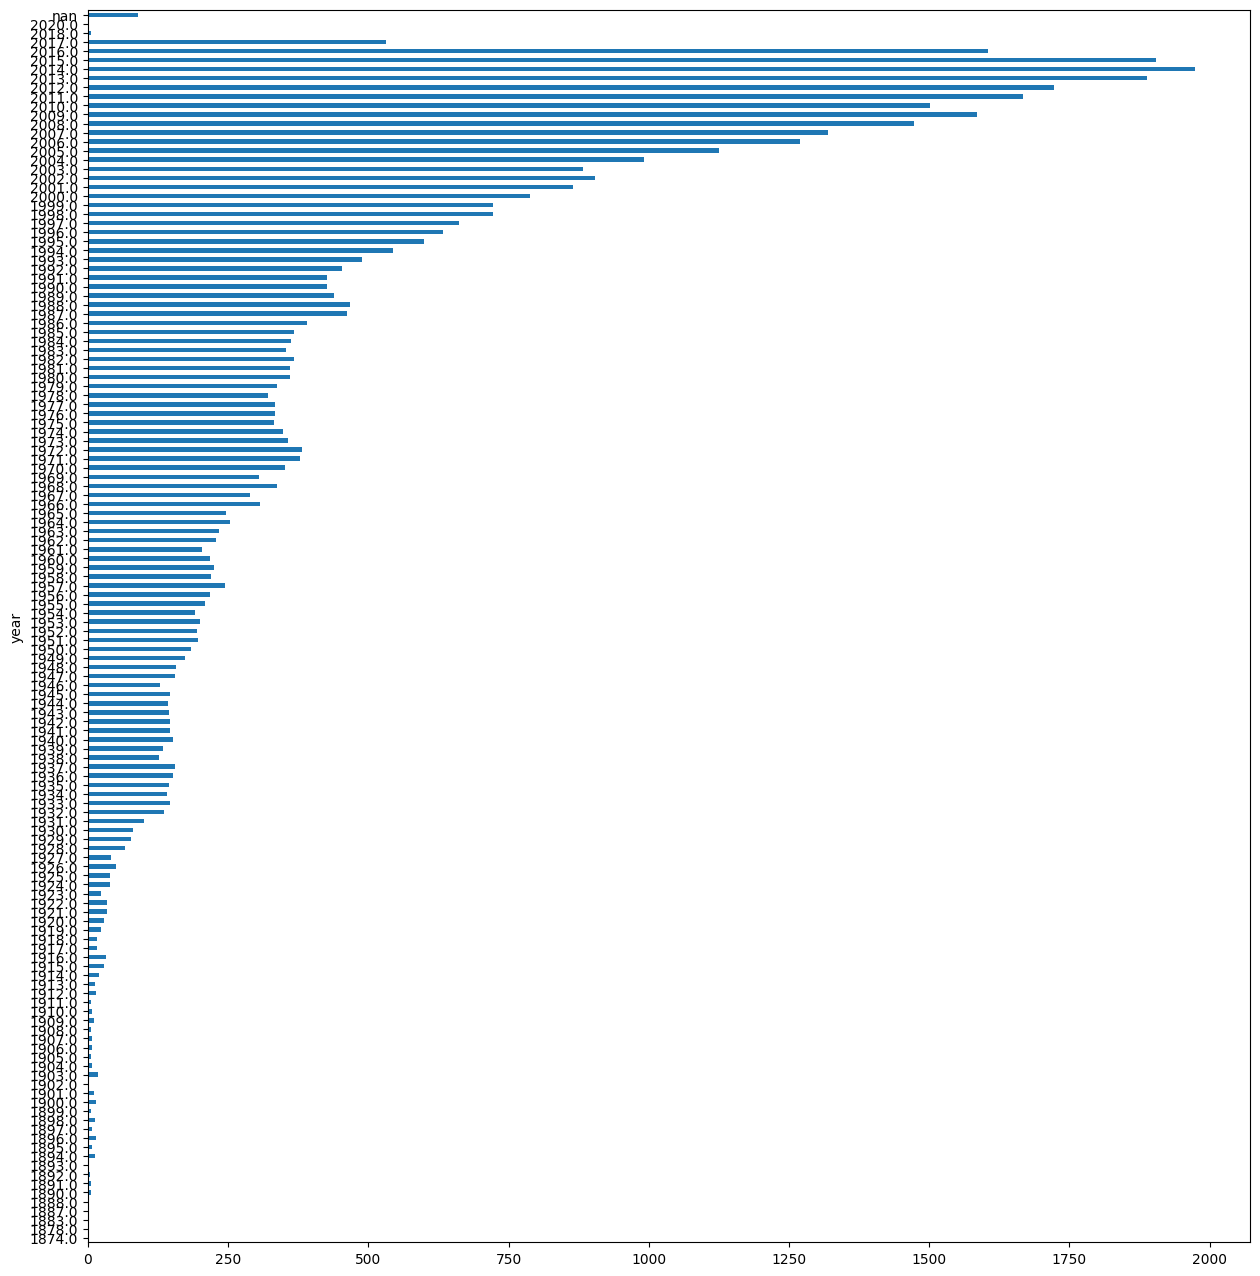

In [ ]:
df3_movies.year.value_counts(dropna = False).sort_index().plot(kind = "barh",figsize = (15,16))

In [ ]:
new_movies = df3_movies.loc[df3_movies.year ==2017,["genres","id","title","year"]]

In [ ]:
new_movies

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [ ]:
data = pd.merge(new_movies,df2_credits,on = "title")

In [ ]:
data.head(5)

,genres,id,title,year,movie_id,cast,crew
0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",339988,The Circle,2017.0,13898,"[{""cast_id"": 3, ""character"": ""Nargess"", ""credi...","[{""credit_id"": ""52fe45b09251416c7505f189"", ""de..."
1,[],324017,The Master,2017.0,68722,"[{""cast_id"": 4, ""character"": ""Freddie Quell"", ...","[{""credit_id"": ""52fe47a0c3a368484e0d169f"", ""de..."
2,"[{'id': 36, 'name': 'History'}, {'id': 10749, ...",354859,The Promise,2017.0,2008,"[{""cast_id"": 13, ""character"": ""Princess Qingch...","[{""credit_id"": ""52fe432bc3a36847f803fb19"", ""de..."
3,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",377691,The Man,2017.0,9074,"[{""cast_id"": 1, ""character"": ""Derrick Vann"", ""...","[{""credit_id"": ""52fe44d8c3a36847f80ad8c9"", ""de..."
4,"[{'id': 18, 'name': 'Drama'}]",408509,Orphan,2017.0,21208,"[{""cast_id"": 1, ""character"": ""Kate Coleman"", ""...","[{""credit_id"": ""52fe440fc3a368484e00d3cb"", ""de..."


In [ ]:
data["genres"].dtype

dtype('O')

In [ ]:
import ast
data["genres"] = data["genres"].map(lambda x: ast.literal_eval(x))
data["cast"] = data["cast"].map(lambda x: ast.literal_eval(x))
data["crew"] = data["crew"].map(lambda x: ast.literal_eval(x))




In [ ]:
data["genres"].dtype







dtype('O')

In [ ]:
import numpy as np

def make_genresList(x):
    gen = []
    for i in x:
        if i.get("name") == "Science Fiction":
            gen.append("Sci-Fi")
        else:
            gen.append(i.get("name"))

    if not gen:  # If the list is empty
        return np.nan
    else:
        return ", ".join(gen)  # Joining the genres with space




In [ ]:
data["genres_list"]= data["genres"].map(lambda x:make_genresList(x))

In [ ]:
data["genres_list"]

,genres_list
0,"Drama, Thriller, Sci-Fi"
1,NaN
2,"History, Romance, Drama"
3,"Drama, Comedy"
4,Drama
5,Horror
6,Comedy
7,"Horror, Action, Fantasy, Thriller"
8,"Comedy, Family, Drama"
9,Documentary


In [ ]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get("name"))
    if casts == []:
        return np.nan
    else:
        return (casts[0])



In [ ]:
data["actor_1_name"]= data["cast"].map(lambda x:get_actor1(x))



In [ ]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get("name"))
    if casts == [] or len(casts)<=1:
        return np.nan
    else:
        return (casts[1])

In [ ]:
data["actor_2_name"]= data["cast"].map(lambda x:get_actor2(x))

In [ ]:
data["actor_2_name"]




,actor_2_name
0,Maryiam Palvin Almani
1,Philip Seymour Hoffman
2,Liu Ye
3,Eugene Levy
4,Peter Sarsgaard
5,Laura Ramsey
6,Simone Kessell
7,Krysten Ritter
8,Brighton Sharbino
9,James Caan


In [ ]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get("name"))
    if casts == [] or len(casts)<=2:
        return np.nan
    else:
        return (casts[2])


In [ ]:
data["actor_3_name"]= data["cast"].map(lambda x:get_actor3(x))

In [ ]:
data["actor_3_name"]


,actor_3_name
0,Mojgan Faramarzi
1,Amy Adams
2,Hong Chen
3,Luke Goss
4,Isabelle Fuhrman
5,Jessica Lucas
6,Tamsin Egerton
7,Sigourney Weaver
8,Jason Lee
9,Natascha McElhone


In [ ]:

import numpy as np

def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get("job") == "Director":
            dt.append(i.get("name"))
    if dt == []:
        return np.nan
    else:
        return ", ".join(dt)





In [ ]:
data["director_name"]= data["crew"].map(lambda x:get_directors(x))



In [ ]:
data["director_name"]

,director_name
0,Jafar Panahi
1,Paul Thomas Anderson
2,Chen Kaige
3,Les Mayfield
4,Jaume Collet-Serra
5,Renny Harlin
6,Roland Joffé
7,Amy Heckerling
8,Frank Lotito
9,Matt Dillon


In [ ]:
data.columns


Index(['genres', 'id', 'title', 'year', 'movie_id', 'cast', 'crew',
       'genres_list', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'director_name'],
      dtype='object')

In [ ]:
movie = data.loc[:,["director_name","actor_1_name","actor_2_name","actor_3_name","genres_list","title"]]

In [ ]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Jafar Panahi,Nargess Mamizadeh,Maryiam Palvin Almani,Mojgan Faramarzi,"Drama, Thriller, Sci-Fi",The Circle
1,Paul Thomas Anderson,Joaquin Phoenix,Philip Seymour Hoffman,Amy Adams,NaN,The Master
2,Chen Kaige,Cecilia Cheung,Liu Ye,Hong Chen,"History, Romance, Drama",The Promise
3,Les Mayfield,Samuel L. Jackson,Eugene Levy,Luke Goss,"Drama, Comedy",The Man
4,Jaume Collet-Serra,Vera Farmiga,Peter Sarsgaard,Isabelle Fuhrman,Drama,Orphan
5,Renny Harlin,Steven Strait,Laura Ramsey,Jessica Lucas,Horror,The Covenant
6,Roland Joffé,Josh Hartnett,Simone Kessell,Tamsin Egerton,Comedy,The Lovers
7,Amy Heckerling,Alicia Silverstone,Krysten Ritter,Sigourney Weaver,"Horror, Action, Fantasy, Thriller",Vamps
8,Frank Lotito,Roni Akurati,Brighton Sharbino,Jason Lee,"Comedy, Family, Drama",Growing Up Smith
9,Matt Dillon,Matt Dillon,James Caan,Natascha McElhone,Documentary,City of Ghosts


In [ ]:
movie.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres_list,1
title,0


In [ ]:
movie = movie.dropna(how ="any")


In [ ]:
movie = movie.rename(columns={"genres_list":"genres","title":"movie_title"})

In [ ]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Jafar Panahi,Nargess Mamizadeh,Maryiam Palvin Almani,Mojgan Faramarzi,"Drama, Thriller, Sci-Fi",The Circle
2,Chen Kaige,Cecilia Cheung,Liu Ye,Hong Chen,"History, Romance, Drama",The Promise
3,Les Mayfield,Samuel L. Jackson,Eugene Levy,Luke Goss,"Drama, Comedy",The Man
4,Jaume Collet-Serra,Vera Farmiga,Peter Sarsgaard,Isabelle Fuhrman,Drama,Orphan
5,Renny Harlin,Steven Strait,Laura Ramsey,Jessica Lucas,Horror,The Covenant
6,Roland Joffé,Josh Hartnett,Simone Kessell,Tamsin Egerton,Comedy,The Lovers
7,Amy Heckerling,Alicia Silverstone,Krysten Ritter,Sigourney Weaver,"Horror, Action, Fantasy, Thriller",Vamps
8,Frank Lotito,Roni Akurati,Brighton Sharbino,Jason Lee,"Comedy, Family, Drama",Growing Up Smith
9,Matt Dillon,Matt Dillon,James Caan,Natascha McElhone,Documentary,City of Ghosts
10,John Singleton,Taylor Lautner,Lily Collins,Alfred Molina,"Fantasy, Drama",Abduction


In [ ]:
movie["movie_title"]= movie["movie_title"].str.lower()

In [ ]:
movie["comb"]= movie["actor_1_name"]+" "+movie["actor_2_name"]+" "+movie["actor_3_name"]+" "+movie["director_name"]+" "+movie["genres"]


In [ ]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Jafar Panahi,Nargess Mamizadeh,Maryiam Palvin Almani,Mojgan Faramarzi,"Drama, Thriller, Sci-Fi",the circle,Nargess Mamizadeh Maryiam Palvin Almani Mojgan...
2,Chen Kaige,Cecilia Cheung,Liu Ye,Hong Chen,"History, Romance, Drama",the promise,Cecilia Cheung Liu Ye Hong Chen Chen Kaige His...
3,Les Mayfield,Samuel L. Jackson,Eugene Levy,Luke Goss,"Drama, Comedy",the man,Samuel L. Jackson Eugene Levy Luke Goss Les Ma...
4,Jaume Collet-Serra,Vera Farmiga,Peter Sarsgaard,Isabelle Fuhrman,Drama,orphan,Vera Farmiga Peter Sarsgaard Isabelle Fuhrman ...
5,Renny Harlin,Steven Strait,Laura Ramsey,Jessica Lucas,Horror,the covenant,Steven Strait Laura Ramsey Jessica Lucas Renny...
6,Roland Joffé,Josh Hartnett,Simone Kessell,Tamsin Egerton,Comedy,the lovers,Josh Hartnett Simone Kessell Tamsin Egerton Ro...
7,Amy Heckerling,Alicia Silverstone,Krysten Ritter,Sigourney Weaver,"Horror, Action, Fantasy, Thriller",vamps,Alicia Silverstone Krysten Ritter Sigourney We...
8,Frank Lotito,Roni Akurati,Brighton Sharbino,Jason Lee,"Comedy, Family, Drama",growing up smith,Roni Akurati Brighton Sharbino Jason Lee Frank...
9,Matt Dillon,Matt Dillon,James Caan,Natascha McElhone,Documentary,city of ghosts,Matt Dillon James Caan Natascha McElhone Matt ...
10,John Singleton,Taylor Lautner,Lily Collins,Alfred Molina,"Fantasy, Drama",abduction,Taylor Lautner Lily Collins Alfred Molina John...


In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/df1_meta.csv")







<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
old = pd.read_csv("/content/drive/MyDrive/df1_meta.csv")





In [ ]:
old.head(4)


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...


In [ ]:
new = pd.concat([old,movie],ignore_index=True)


In [ ]:
new.shape


(5055, 7)

In [ ]:
movie.shape





(12, 7)

In [ ]:
old.shape


(5043, 7)

In [ ]:
new.drop_duplicates(subset = "movie_title",keep = "last",inplace = True)





In [ ]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5050,Frank Lotito,Roni Akurati,Brighton Sharbino,Jason Lee,"Comedy, Family, Drama",growing up smith,Roni Akurati Brighton Sharbino Jason Lee Frank...
5051,Matt Dillon,Matt Dillon,James Caan,Natascha McElhone,Documentary,city of ghosts,Matt Dillon James Caan Natascha McElhone Matt ...
5052,John Singleton,Taylor Lautner,Lily Collins,Alfred Molina,"Fantasy, Drama",abduction,Taylor Lautner Lily Collins Alfred Molina John...
5053,Phillip Noyce,Val Kilmer,Elisabeth Shue,Rade Serbedzija,"Action, Adventure, Crime",the saint,Val Kilmer Elisabeth Shue Rade Serbedzija Phil...


In [ ]:
new.to_csv("/content/drive/MyDrive/new.csv", index=False)

In [ ]:
pd.set_option("display.max_colwidth",75)
data


,genres,id,title_x,year,title_y,cast,crew
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}, {'id': ...",426469,Growing Up Smith,2017.0,Growing Up Smith,"[{""cast_id"": 4, ""character"": ""Smith Bhatnagar"", ""credit_id"": ""582e0ba5c...","[{""credit_id"": ""582e0bdfc3a368772600b6c1"", ""department"": ""Directing"", ""..."


In [ ]:
df2_credits.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [ ]:
data = pd.merge(new_movies,df2_credits,on = "id")

In [ ]:
data.columns

Index(['genres', 'id', 'title_x', 'year', 'title_y', 'cast', 'crew'], dtype='object')

In [ ]:
data.head(5)

,genres,id,title_x,year,title_y,cast,crew
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}, {'id': ...",426469,Growing Up Smith,2017.0,Growing Up Smith,"[{""cast_id"": 4, ""character"": ""Smith Bhatnagar"", ""credit_id"": ""582e0ba5c...","[{""credit_id"": ""582e0bdfc3a368772600b6c1"", ""department"": ""Directing"", ""..."


In [ ]:
data["genres"].dtypes

dtype('O')

In [ ]:
pd.set_option("display.max_colwidth",75)

In [ ]:
import ast
data["genres"] = data["genres"].map(lambda x:ast.literal_eval(x))
data["cast"] = data["cast"].map(lambda x:ast.literal_eval(x))
data["crew"] = data["crew"].map(lambda x:ast.literal_eval(x))

In [ ]:
data["genres"].dtypes

dtype('O')

In [ ]:


# Function to process genres
def make_genreslist(x):
    gen = []
    for i in x:
        if i.get("name") == "Science Fiction":
            gen.append("Sci-Fi")  # Change "Science Fiction" to "Sci-Fi"
        else:
            gen.append(i.get("name"))  # Add the genre name
    if not gen:  # If no genres are found
        return np.NaN
    else:
        return ", ".join(gen)  # Join genre names with space

# Apply the function to the 'genres' column
data["genres_list"] = data["genres"].map(lambda x: make_genreslist(x))

# Display the DataFrame with the 'genres_list' column
data[["id","genres_list"]]




,id,genres_list
0,426469,"Comedy, Family, Drama"


In [ ]:
def get_actor1(x):
  casts = []
  for i in x:
    casts.append(i.get("name"))
  if casts == []:
    return np.NaN
  else:
    return (casts[0])


In [ ]:
data["actor_1_name"]= data["cast"].map(lambda x:get_actor1(x))

In [ ]:
def get_actor2(x):
  casts = []
  for i in x:
    casts.append(i.get("name"))
  if casts == [] or len(casts)<=1:
    return np.NaN
  else:
    return (casts[1])

In [ ]:
data["actor_2_name"]= data["cast"].map(lambda x:get_actor2(x))

In [ ]:
data["actor_2_name"]

,actor_2_name
0,Brighton Sharbino
